### Week 2
### DSC 550
### Abed Tabbalat

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [32]:
# Settings
pd.options.display.float_format = '{:,.0f}'.format

colors = sns.color_palette('pastel')[0:10]

The dataset that I have chosen will be regarding Esports earnings. I have always been up to date on the gaming industry. However, I have only played games for fun and never had an exposure on how much who people earn going to gaming tournaments. Different countries should vary depending on the popularity of Esports but these are things that I am curious to find out.

I am interested in knowing the following:
* The amounts earned per video game and genre
* Trend of number of Country Earnings compared to Total Money
* Trend of number of players and number of tournaments
* Finding which game produced the most earnings based on release date

In [33]:
# importing dataset
df = pd.read_csv('Esport_Earnings.csv')
df.head()

,IdNo,TotalMoney,GameName,Genre,PlayerNo,TournamentNo,Top_Country,Top_Country_Earnings,Releaseyear
0,613,310,Acceleration of SUGURI 2,Fighting Game,6,2,United States,310,2018
1,510,"190,076",Age of Empires,Strategy,246,95,Viet Nam,"123,408",1997
2,179,"1,492,490",Age of Empires II,Strategy,956,576,China,"174,252",1999
3,177,"68,114",Age of Empires III,Strategy,106,76,United States,"18,524",2005
4,540,"2,668",Age of Empires Online,Strategy,16,7,Germany,"1,264",2011


In [34]:
# Grouping by Genre to get sum of total earning by Genre
df_1 = df.groupby('Genre').sum().reset_index()
df_1 = df_1[['Genre', 'TotalMoney']]
df_1 = df_1.sort_values(by='TotalMoney', ascending=True)
df_1

,Genre,TotalMoney
5,Puzzle Game,"39,083"
10,Third-Person Shooter,"4,901,986"
7,Role-Playing Game,"5,968,597"
6,Racing,"7,753,329"
2,Fighting Game,"20,170,322"
8,Sports,"26,182,618"
1,Collectible Card Game,"34,271,398"
9,Strategy,"64,507,956"
0,Battle Royale,"132,922,523"
3,First-Person Shooter,"228,333,625"


In [35]:
# Converting dataframe to thousands for dollar amounts only
df_1['TotalMoney'] = df_1['TotalMoney'] / 1000
df_1


,Genre,TotalMoney
5,Puzzle Game,39
10,Third-Person Shooter,"4,902"
7,Role-Playing Game,"5,969"
6,Racing,"7,753"
2,Fighting Game,"20,170"
8,Sports,"26,183"
1,Collectible Card Game,"34,271"
9,Strategy,"64,508"
0,Battle Royale,"132,923"
3,First-Person Shooter,"228,334"


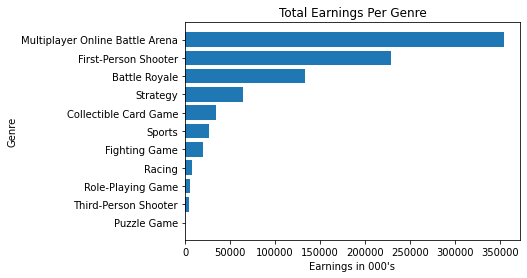

In [36]:
# Creating a horizantal barchart to show the earnings for each Genre
plt.barh(df_1['Genre'], df_1['TotalMoney'])
plt.title('Total Earnings Per Genre')
plt.ylabel('Genre')
plt.xlabel("Earnings in 000's")
plt.show()

By looking at the bar chart above, we can determine that the most genre that gave earnings would be Multiplayer Online Battle Arena followed by First Person Shooter on a further scale than the rest. This makes sense because these 2 genres have the flexibility on forming teams and training with creating a team work strategy in winning rounds. Making them easy to build tournaments.

In [37]:
# Grouping df by game release date
df_2 = df.groupby('Releaseyear').sum().reset_index()
df_2['Top_Country_Earnings'] = df_2['Top_Country_Earnings'] / 1000
df_2['TotalMoney'] = df_2['TotalMoney'] / 1000
df_2 = df_4.drop(df_4.index[0])
df_2

,Releaseyear,IdNo,TotalMoney,PlayerNo,TournamentNo,Top_Country_Earnings
2,1989,628,16,27,7,13
3,1993,1001,5,32,10,3
4,1994,1622,29,140,58,20
5,1995,2290,13,33,15,5
6,1996,1718,105,67,24,38
7,1997,1758,340,313,124,232
8,1998,3748,"8,260",708,582,"7,585"
9,1999,4220,"2,999",1576,857,938
10,2000,2956,"13,729",4241,1033,"3,048"
11,2001,2658,"3,665",2070,2678,"2,679"


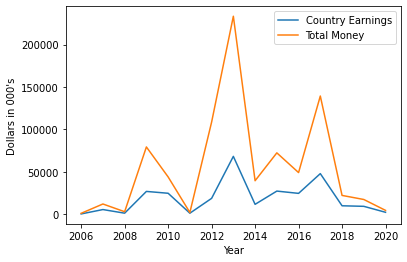

In [38]:
# Creating trend to show Top Country Earnings and Total Money based on games released year date.
plt.plot(df_2['Releaseyear'].tail(15), df_2['Top_Country_Earnings'].tail(15))
plt.plot(df_2['Releaseyear'].tail(15), df_2['TotalMoney'].tail(15))
plt.xlabel('Year')
plt.ylabel("Dollars in 000's")
plt.legend(['Country Earnings', 'Total Money'])
plt.show()

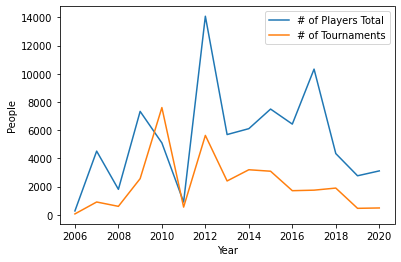

In [39]:
# Creating trend to show Number of Players and Number of tournaments based on games released year date.
plt.plot(df_2['Releaseyear'].tail(15), df_2['PlayerNo'].tail(15))
plt.plot(df_2['Releaseyear'].tail(15), df_2['TournamentNo'].tail(15))
plt.xlabel('Year')
plt.ylabel('People')
plt.legend(['# of Players Total', '# of Tournaments'])
plt.show()

Looking at both charts above, video games released in between 2012 and 2014 have the highest amount of player volume, tournament volume, which makes sense that total earnings and country winning earnings would be the highest. Which raises the question, what games would those be?

In [40]:
# Using first table will filter for the years 2012 to 2014
df_3 = df[df['Releaseyear'].between(2012, 2014)]
df_3 = df_3.sort_values(by='TotalMoney', ascending=False)
df_3['Top_Country_Earnings'] = df_3['Top_Country_Earnings'] / 1000
df_3['TotalMoney'] = df_3['TotalMoney'] / 1000
df_3

,IdNo,TotalMoney,GameName,Genre,PlayerNo,TournamentNo,Top_Country,Top_Country_Earnings,Releaseyear
114,231,"227,420",Dota 2,Multiplayer Online Battle Arena,3836,1434,China,"65,061",2013
85,245,"102,474",Counter-Strike: Global Offensive,First-Person Shooter,13032,5252,Denmark,"15,379",2012
207,328,"23,098",Hearthstone,Collectible Card Game,2423,898,China,"3,598",2014
392,351,"8,640",SMITE,Multiplayer Online Battle Arena,522,95,United States,"3,513",2014
55,364,"2,609",Call of Duty: Advanced Warfare,First-Person Shooter,783,404,United States,"2,070",2014
...,...,...,...,...,...,...,...,...,...
452,474,0,TowerFall: Ascension,Fighting Game,0,0,None,0,2013
224,363,0,Just Dance 2014,Sports,3,1,Brazil,0,2014
462,395,0,Trials Fusion,Racing,0,0,None,0,2014
97,269,0,Dead or Alive 5 Ultimate,Fighting Game,37,7,Netherlands,0,2013


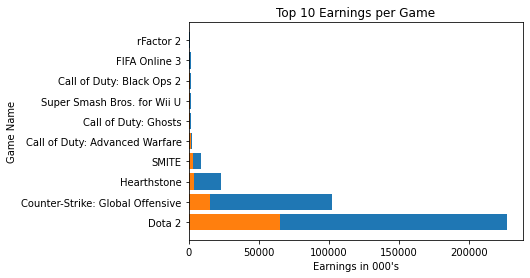

In [41]:
# Creating a bar chart of the top 10 highest earnings per game for games released between 2012 and 2014
plt.barh(df_3['GameName'].head(10), df_3['TotalMoney'].head(10))
plt.barh(df_3['GameName'].head(10), df_3['Top_Country_Earnings'].head(10))
plt.title('Top 10 Earnings per Game')
plt.ylabel('Game Name')
plt.xlabel("Earnings in 000's")
plt.show()

Not surprised here, Dota 2 was the first game in competetion with League of Legends that caused the Esports industry to rise and become more popular. Counter Strike comes in second by far and then all other games become on a different level with a much smaller scale.

To conclude, Dota 2 and Counter Strike seems to be the first games who kicked off with Esports business and till this day are growing in investments and earnings. Making them the highest paying Esports games to date. Both games fall under the Battle Royal Multiplayer and Counter Strike in First Person Shooter which shows they are at the top with earnings. If anyone wants to go big in Dota 2, what I will say is good luck! All these charts would only mean that the competetion is extremely high.